## Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Task 2: To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [7]:
#Reading and Displaying the dataset
df=pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


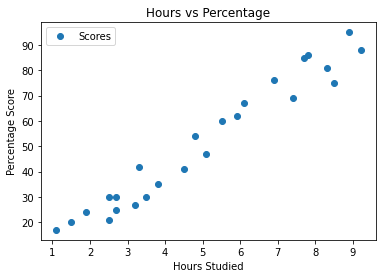

In [10]:
# Visualising the data using matplotlib
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# From the above graph we can se that the relation between score and hours is positive linear

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X= df.drop(columns = ['Scores'])
Y= df['Scores']
X.shape
Y.shape
X = np.array(X)
Y = np.array(Y)
Y=Y.reshape(-1,1)

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [15]:
#Preparing the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [18]:
#Training the Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_predict = LinearRegression_model.predict(X_test)
Y_predict

array([[29.93156381],
       [49.73526456],
       [18.61516338],
       [34.64673066],
       [29.93156381],
       [78.02626564],
       [37.47583076]])

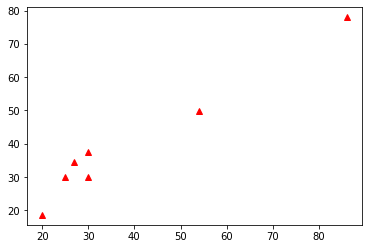

In [22]:
#Visualize the traing data
plt.plot(Y_test, Y_predict, '^',color = 'r')

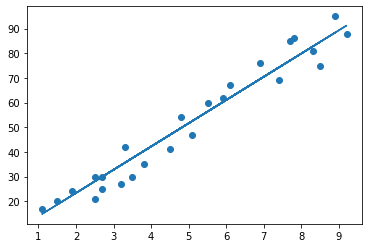

In [23]:
# Plotting the regression line
line = LinearRegression_model.coef_*X+LinearRegression_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

## Making Pridictions
Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
# Comparing Actual vs Predicted
df_i = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predict.flatten()})  
df_i

,Actual,Predicted
0,30,29.931564
1,54,49.735265
2,20,18.615163
3,27,34.646731
4,25,29.931564
5,86,78.026266
6,30,37.475831


In [30]:
# You can also test with your own data
hours = [[9.25]]
own_pred = LinearRegression_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [91.70024949]


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [31]:
Y_pred = LinearRegression_model.predict([[9.25]])

In [32]:
k = X_test.shape[1]
n = len(X_test)
n
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(Y_test, Y_predict)), '3f'))
MSE = mean_squared_error(Y_test, Y_predict)
MAE = mean_absolute_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [33]:
print('RMSE -',RMSE, '\nMSE -',MSE, '\nMAE -',MAE, '\nR2 -',r2, '\nAdjusted R2 -',adj_r2)

RMSE - 5.636257 
MSE - 31.767388710366788 
MAE - 4.820838262884076 
R2 - 0.9325503922866811 
Adjusted R2 - 0.9190604707440173
